In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('ab_data.csv')

In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
df.shape

(294478, 5)

In [11]:
df.groupby('group')['user_id'].count()

group
control      147202
treatment    147276
Name: user_id, dtype: int64

In [13]:
df.groupby('user_id').count().sort_values(by='landing_page', ascending=False).head(5)

,timestamp,group,landing_page,converted
user_id,,,,
729669,2,2,2,2
825266,2,2,2,2
663033,2,2,2,2
674959,2,2,2,2
875210,2,2,2,2


In [17]:
df_old = df[df['landing_page']=='old_page']
df_new = df[df['landing_page']=='new_page']

df_merged = df_old.merge(df_new,  on='user_id')


setusers = set(df_merged['user_id'])

df_flt = df[~df['user_id'].isin(setusers)]


In [16]:
df[df['user_id']==773693]

,user_id,timestamp,group,landing_page,converted
226,773693,2017-01-23 18:05:45.167335,control,old_page,1
68887,773693,2017-01-12 12:52:52.267231,control,new_page,0


In [20]:
df_flt.shape

(290482, 5)

In [21]:
# HO - нет разницы в конверсии
# H1 - есть значимая разница в конверсии

In [22]:
df_cont = df_flt[df_flt['group']=='control']
df_exp = df_flt[df_flt['group']=='treatment']

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


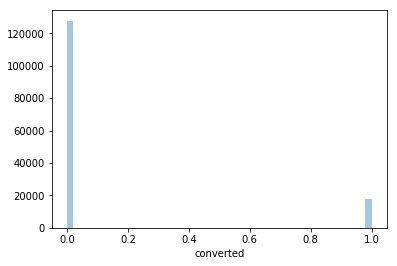

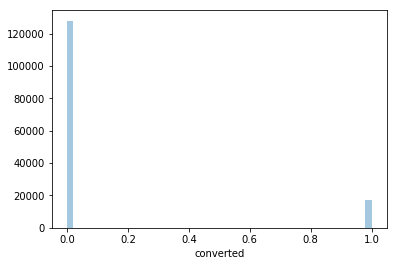

In [27]:
sns.distplot(df_cont['converted'], kde=False)
plt.show()
sns.distplot(df_exp['converted'], kde=False)
plt.show()

In [28]:
# выше распределение ненормальное, а бернулли
# поэтому это нам не подходит , так как Т-стьюдент работает только с нормальным
# поэтому для приведения к нормальному распределению пишем ЦПТ

In [29]:
import numpy as np

In [30]:
def get_cl_samp(data, size=100, iters=1000):
    res=[]
    for i in range(iters):
        samp = np.random.choice(data, size=size)
        res.append(np.mean(samp))
    return res

In [31]:
norm_cont= get_cl_samp(df_cont['converted'], size=15000, iters=500) # 15000 семплы, надо брать в 10 раз меньше выборки
norm_exp= get_cl_samp(df_exp['converted'], size=15000, iters=500)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


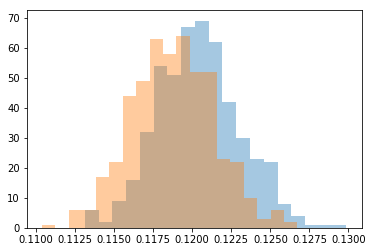

In [34]:
sns.distplot(norm_cont, kde=False)

sns.distplot(norm_exp, kde=False)
plt.show()

# alpha = 0.001

from scipy import stats

In [36]:
print(np.mean(norm_cont), np.mean(norm_exp)) # это средняя доля кликов из семплов, то есть в среднем 0,12 кликов на семпл

0.12041466666666666 0.118754


In [37]:
stats.ttest_ind(norm_exp, norm_cont)

Ttest_indResult(statistic=-9.938419284634984, pvalue=2.942850593206151e-22)

In [ ]:
# вывод : число pvalue маленькое НАДО СМОТРЕТЬ НА e-22!!!! ,  НО statistic - отрицательное значение, 
# что означает, что мы сделали ЗНАЧИМО хуже, поэтому гипотезу 
# не отвергаем

# если бы statistic было положительное, то надо было отвергать нулевую гипотезу, так как pvalue маленькое.

In [38]:
round(stats.ttest_ind(norm_exp, norm_cont)[1], 7)

0.0

### Производные - 
- по производной мы можем понять, в какую сторону движется карьера
- производная от функции расстояния от времени - это скорость
- производная скорости - это ускорение или торможение(отрицательная)


In [ ]:
x = list(range(-10, 11))
plt.plot(
x.)

зачем это нужно???

- можно найти минимум или максимум функции (например в какой момент времени машина стояла, в каком месяце был пик карьеры)
- в каждый момент времени понимаем, какой у нас тренд, растем или падаем





распределение пуассона - когда конечное число событий за какое-то фиксированное время.
В футболе - кол-во голов, которые забьет команда
это дискретное распределение

а нормальное распределение - оно непрерывное

экстраполировать локальную выборочную вероятность на глобальную генеральную совокупность (отчеты о погибших)

много раз подкидываем монету, а потом смотрим, какие n подобрать, чтобы получилась вероятность

In [42]:
[1 for i in range(65)]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [43]:
np.arange(0 , 5 , 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [ ]:
Шаги процесса:
1. получили распределение - например это дискретное распределение пуассона 
2. применяем метод максимального правдоподобия - произведение вероятностей
3. нашли производную от функции правдоподобия
4. приравняли ее к 0
5. нашли корень, то есть лямбду
6. подставили лябдму в функцию пуассона
7. теперь можно подставлять К и получать любые вероятности.

в глобальном смысле - пытаемся таким образом максимально приблизить функцию, чтобы уменьшить отклонения
то есть обобщили аппроксимирующую функцию по точкам (которые у нас есть в выборке)